## GridSearchCV_

In [1]:
#importing required liabraries:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Reading and understanding data:-

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.shape

(400, 3)

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## 2.Data Quality check:-

In [6]:
#checking missing value:-

df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

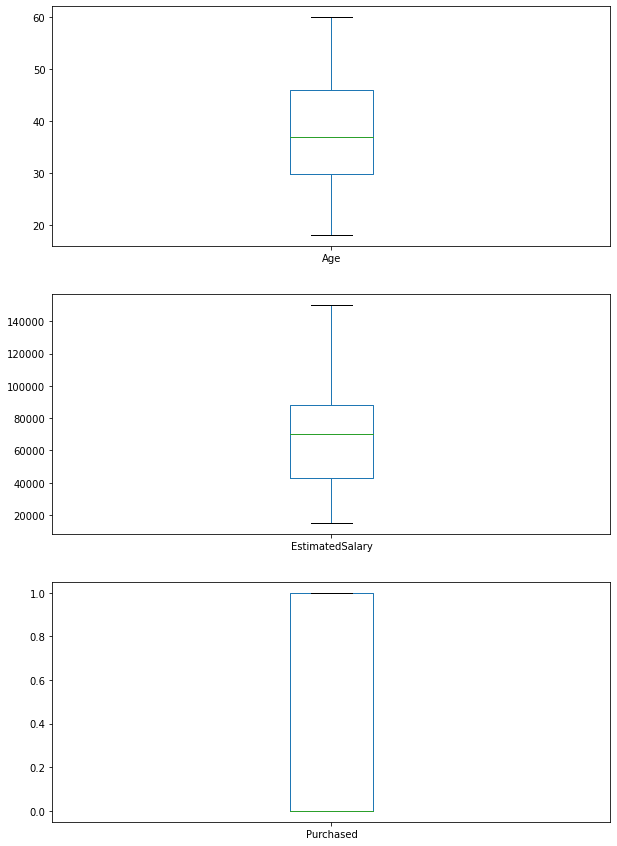

In [7]:
#checking outliers and treatment:-

df.plot(kind='box', subplots=True,figsize=(10,15), layout=(3,1))
plt.show()

## 3.Data anlysis_

In [8]:
# 1.Univarient anlysis:-

uni = list(df.describe().columns)
uni

['Age', 'EstimatedSalary', 'Purchased']

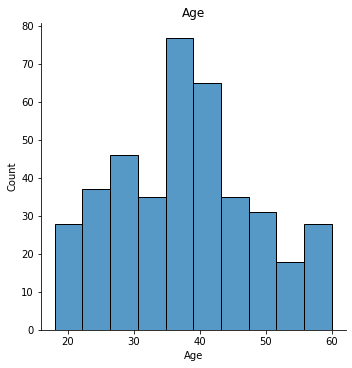

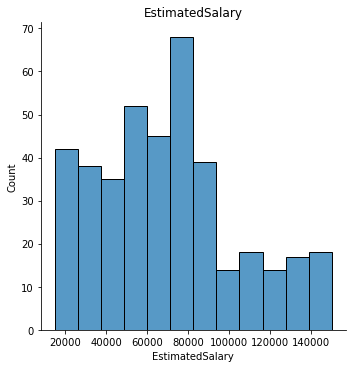

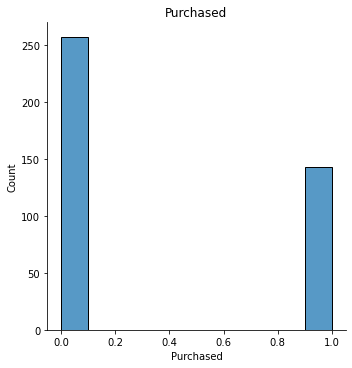

In [9]:
for i in uni:
    sns.displot(df[i])
    plt.title(i)
    plt.show()

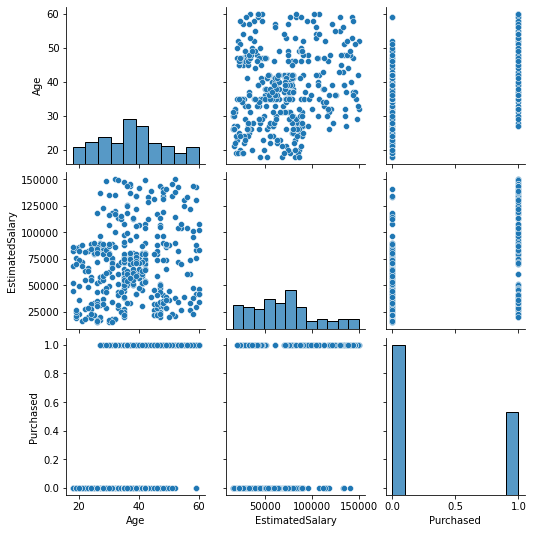

In [10]:
#2. biavarient analysis:-

sns.pairplot(df)
plt.show()

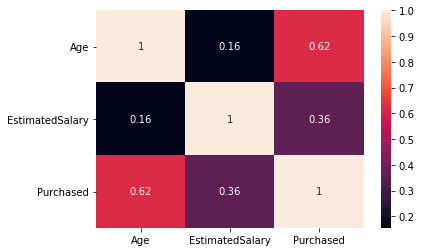

In [11]:
#3.multivarient analysis:-
    
sns.heatmap(df.corr(), annot=True)
plt.show()

## 4.Data preparation:-

In [12]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [13]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### I.Feature scalling:-

In [15]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [16]:
X = scale.fit_transform(x)
X.shape

(400, 2)

### II. Train_Test_Split_

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=42)

## 5.Fit the model:- (classifier - SVM)

In [18]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

## 6.Predict the model:-

In [19]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

## 7.Evalute the model:-

In [20]:
#using confusion metrics and accuracy score:-

from sklearn.metrics import confusion_matrix,accuracy_score

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))

print('\naccuracy score:',accuracy_score(y_test,y_pred))

confusion_matrix:
 [[57  6]
 [ 1 36]]

accuracy score: 0.93


## Aplying Grid Search CV_ 

In [21]:
# to find the best model and best parameter:-

from sklearn.model_selection import GridSearchCV

classifier.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [22]:
params = [{'C' : [1,10,100,1000], 'kernel':['linear']},
         {'C' : [1,10,100,1000], 'kernel':['rbf'],
          'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
params

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [1, 10, 100, 1000],
  'kernel': ['rbf'],
  'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [27]:
#for searching all the combination for parameter dictionary in gridsearchcv:-

grid_search = GridSearchCV(estimator=classifier,
                     param_grid=params,
                     cv=10,
                     n_jobs=-1)

In [29]:
#fitting to our training dataset:-

grid_search = grid_search.fit(x_train,y_train)
grid_search


GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}])

In [32]:
#taking the best estimator search by gridsearchCV in svc_best variable:-

svc_best = grid_search.best_estimator_
svc_best

SVC(C=1, gamma=0.7, random_state=0)

In [34]:
#fitting the train dataset in to best estimator:-

svc_best.fit(x_train,y_train)

SVC(C=1, gamma=0.7, random_state=0)

In [35]:
#than we predict the test result:-

y_pred = svc_best.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
# and we find accuracy score:-

acc = accuracy_score(y_pred,y_test)
print('accuracy_score:',acc)

accuracy_score: 0.94


In [42]:
best_accuracy = grid_search.best_score_
print('best_accuracy',best_accuracy)

best_parameter = grid_search.best_params_
print('\nbest_parameter',best_parameter)


best_accuracy 0.9099999999999999

best_parameter {'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}


## Aplying Random_searchCV :- 

In [67]:
#to tune the hyper parameter by importing classifier:-

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()

classifier_rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [68]:
classifier_rf = RandomForestClassifier(random_state=42,
                                      n_jobs= -1,
                                      max_depth=5,
                                      oob_score=True)


In [77]:
k_fold_cv=5 #straitified 5-fold cross validation

params = { 'n_estimators' : [10,50,100],
         'max_features' : ['auot','log2','sqrt'],
         'bootstrap' : [True,False]}

params

{'n_estimators': [10, 50, 100],
 'max_features': ['auot', 'log2', 'sqrt'],
 'bootstrap': [True, False]}

In [71]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=classifier_rf,param_distributions = params, 
                            cv = k_fold_cv,
                           n_iter=5,
                           scoring='neg_mean_absolute_error',
                           verbose = 2,
                           random_state= 42,
                           n_jobs= -1,
                            return_train_score=True)
random

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=5, n_jobs=-1,
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auot', 'log2',
                                                         'sqrt'],
                                        'n_estimators': [10, 50, 100]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [72]:
random.fit(x_train,y_train)
print('best hyper parameter:', random.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan -0.10333333 -0.10333333 -0.11      ]
  warnings.warn(
C:\Users\nikhil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [        nan         nan -0.05666667 -0.05666667 -0.06583333]
  warnings.warn(


best hyper parameter: {'n_estimators': 100, 'max_features': 'sqrt', 'bootstrap': True}
